In [98]:
import datetime

import numpy as np
import pandas as pd
from dateutil import tz
import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter

In [99]:
ping_data = pd.read_csv('./data/ping_data.csv')
ping_data_wireless = pd.read_csv('./data/ping_data_rp59adf374.csv')
ping_data_ethernet = pd.read_csv('./data/ping_data_rp829c7e0e.csv')

In [100]:
ping_data_ethernet.describe()

,timestamp,local_avg,remote_avg
count,6.974500e+04,69745.000000,69745.000000
mean,1.559375e+09,782.506427,793.170246
std,1.861936e+05,2685.044084,2682.048286
min,1.559041e+09,0.140000,4.020000
25%,1.559208e+09,0.150000,8.180000
50%,1.559385e+09,0.150000,8.620000
75%,1.559526e+09,0.150000,9.570000
max,1.559691e+09,9999.999900,9999.999900


In [101]:
ping_data_wireless.describe()

,timestamp,local_avg,remote_avg
count,7.246300e+04,72463.000000,72463.000000
mean,1.559380e+09,1228.909344,1238.649549
std,1.857660e+05,3267.419743,3263.714778
min,1.559041e+09,0.150000,2.350000
25%,1.559213e+09,0.310000,8.700000
50%,1.559396e+09,0.730000,9.550000
75%,1.559539e+09,2.000000,13.310000
max,1.559691e+09,9999.999900,9999.999900


In [102]:
ping_data_wireless['timestamp'] = pd.to_datetime(ping_data_wireless['timestamp'], unit='s')
ping_data_wireless['timestamp'] = ping_data_wireless.timestamp.dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

ping_data_ethernet['timestamp'] = pd.to_datetime(ping_data_ethernet['timestamp'], unit='s')
ping_data_ethernet['timestamp'] = ping_data_ethernet.timestamp.dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
ping_data.head()

,timestamp,location,source,local_dest,local_avg,remote_dest,remote_avg
0,1.559041e+09,lower-level,wireless,192.168.0.1,4.39,142.254.217.53,9.09
1,1.559041e+09,lower-level,wireless,192.168.0.1,0.49,142.254.217.53,16.75
2,1.559041e+09,lower-level,wireless,192.168.0.1,0.56,142.254.217.53,8.31
3,1.559041e+09,lower-level,wireless,192.168.0.1,1.64,142.254.217.53,9.40
4,1.559041e+09,lower-level,wireless,192.168.0.1,1.18,142.254.217.53,9.07


In [103]:
# timespan of time series data
timespan = ping_data_wireless['timestamp'][-1:] - ping_data_wireless['timestamp'][0]
print('Start Date:', ping_data_wireless['timestamp'].iloc[0])
print('  End Date:', ping_data_wireless['timestamp'].iloc[-1])
print('  Timespan:', timespan.iloc[-1])

Start Date: 2019-05-28 06:55:09.385333504-04:00
  End Date: 2019-06-04 19:24:59.901003008-04:00
  Timespan: 7 days 12:29:50.515669504


In [104]:
# clip loss of network (9999.9999) and timeouts (2000.0)
ping_data_wireless = ping_data_wireless[ping_data_wireless['local_avg'] < 2000]
ping_data_wireless = ping_data_wireless[ping_data_wireless['remote_avg'] < 2000]

ping_data_ethernet = ping_data_ethernet[ping_data_ethernet['local_avg'] < 2000]
ping_data_ethernet = ping_data_ethernet[ping_data_ethernet['remote_avg'] < 2000]
ping_data_ethernet.describe()

,local_avg,remote_avg
count,64283.000000,64283.000000
mean,0.226775,11.786184
std,3.802962,25.036308
min,0.140000,4.020000
25%,0.150000,8.150000
50%,0.150000,8.540000
75%,0.150000,9.200000
max,666.770000,1338.870000


In [105]:
# clip outliers (anomalies)
qt = ping_data_wireless['local_avg'].quantile(0.98)
ping_data_wireless = ping_data_wireless[ping_data_wireless['local_avg'] <= qt]

qh = ping_data_wireless['remote_avg'].quantile(0.98)
ping_data_wireless = ping_data_wireless[ping_data_wireless['remote_avg'] <= qh]
ping_data_wireless.describe()

,local_avg,remote_avg
count,60976.000000,60976.000000
mean,1.397287,11.464639
std,3.156401,7.903629
min,0.150000,2.350000
25%,0.220000,8.580000
50%,0.540000,9.250000
75%,1.180000,10.410000
max,32.040000,70.230000


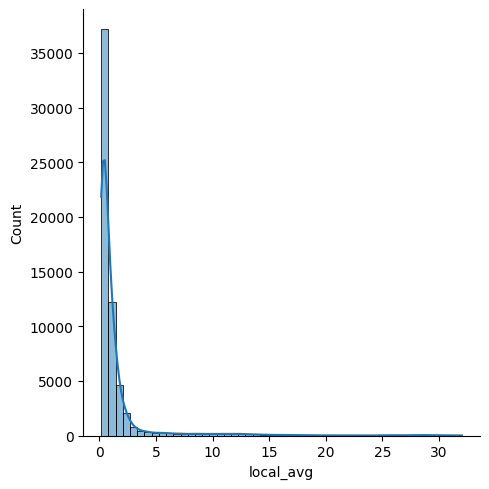

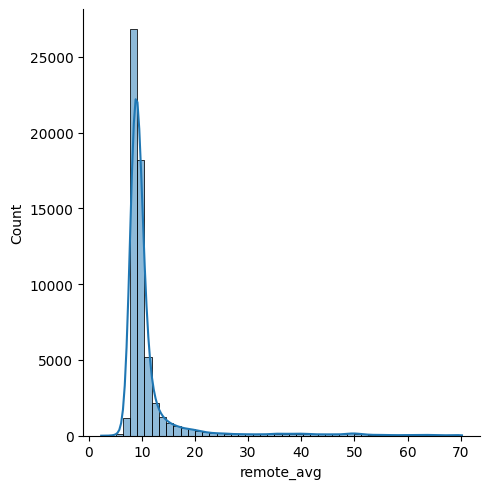

In [106]:
import seaborn as sns
sns.displot(ping_data_wireless['local_avg'], kde=True, bins=50)
sns.displot(ping_data_wireless['remote_avg'], kde=True, bins=50)

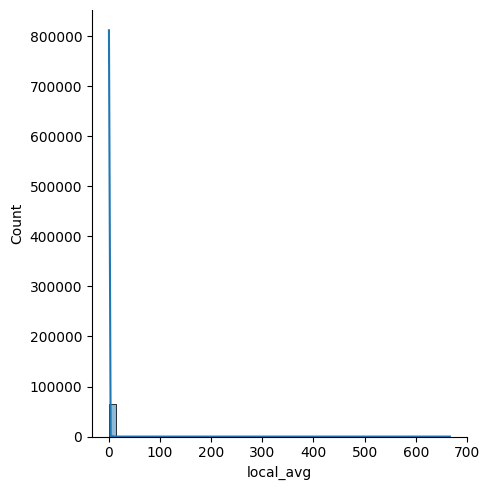

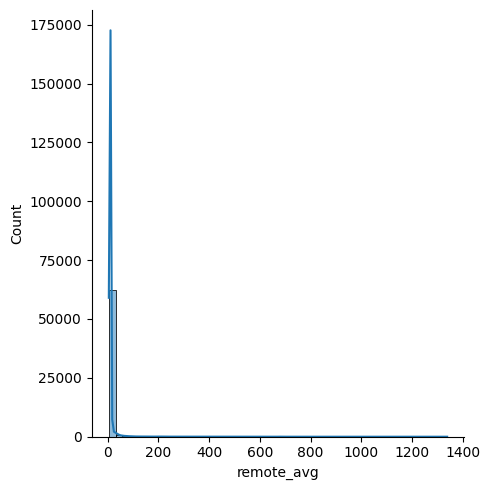

In [107]:
sns.displot(ping_data_ethernet['local_avg'], kde=True, bins=50)
sns.displot(ping_data_ethernet['remote_avg'], kde=True, bins=50)

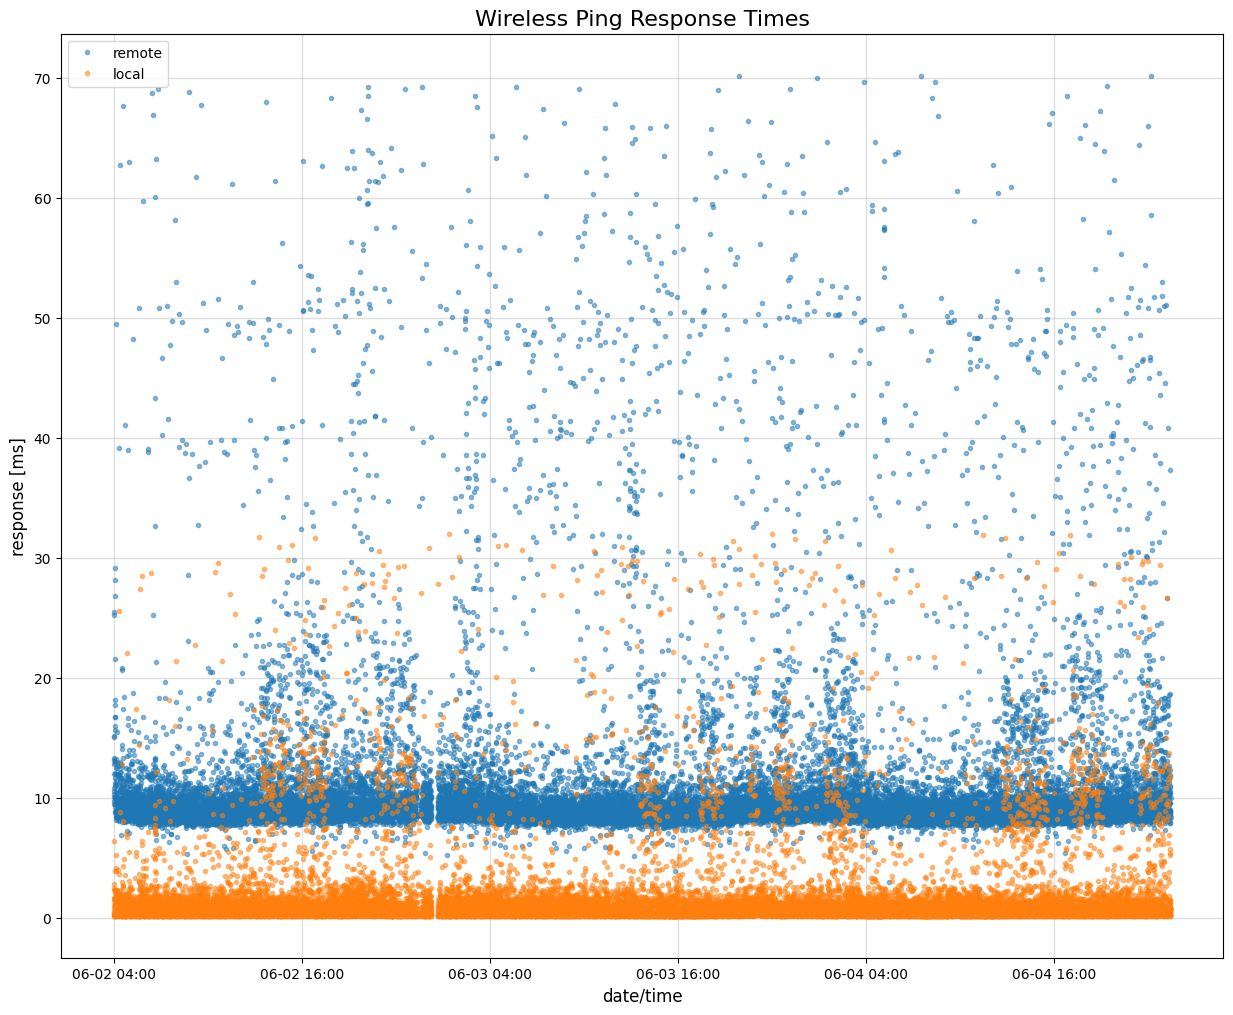

In [108]:
# plot network data
wireless_df = ping_data_wireless[(ping_data_wireless['timestamp'] >= '2019-06-02') & (ping_data_wireless['timestamp'] < '2019-06-06')]

_, ax = plt.subplots(1, 1, figsize=(15, 12))
ax.plot(wireless_df['timestamp'], wireless_df['remote_avg'], linestyle=' ', marker='.', alpha=0.5, label='remote')
ax.plot(wireless_df['timestamp'], wireless_df['local_avg'], linestyle=' ', marker='.', alpha=0.5, label='local')
ax.xaxis.set_major_formatter(DateFormatter('%m-%d %H:%M'))
ax.legend()
ax.set_title('Wireless Ping Response Times', fontsize=16)
ax.set_xlabel('date/time', fontsize=12)
ax.set_ylabel('response [ms]', fontsize=12)
ax.grid(color='silver', linestyle='solid', linewidth=1, alpha=0.5)

plt.show()

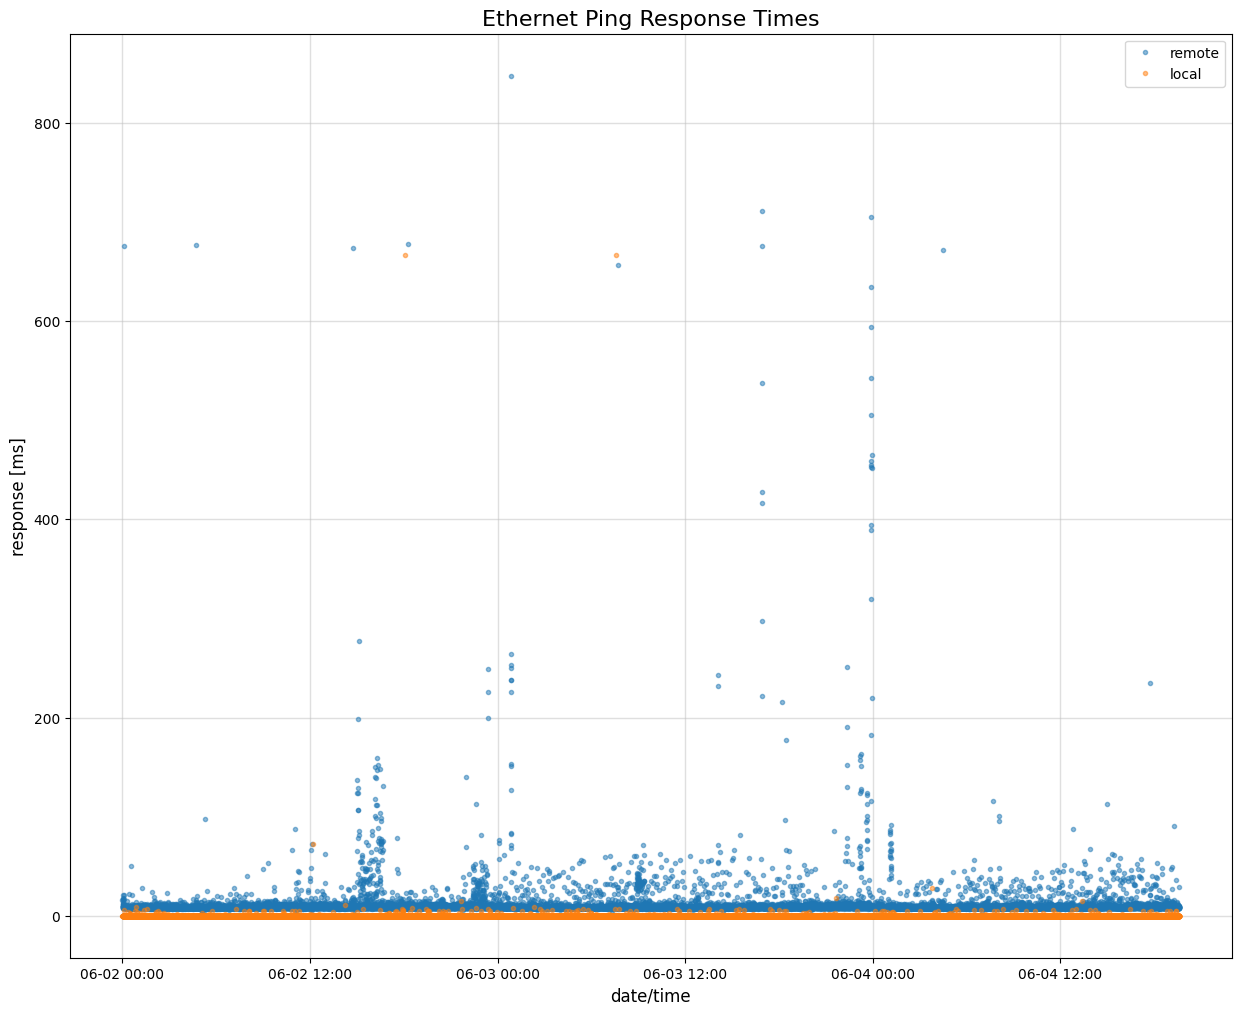

In [109]:
ethernet_df = ping_data_ethernet[(ping_data_ethernet['timestamp'] >= '2019-06-02') & (ping_data_ethernet['timestamp'] < '2019-06-06')]

_, ax = plt.subplots(1, 1, figsize=(15, 12))
ax.plot(ethernet_df['timestamp'], ethernet_df['remote_avg'], linestyle=' ', marker='.', alpha=0.5, label='remote')
ax.plot(ethernet_df['timestamp'], ethernet_df['local_avg'], linestyle=' ', marker='.', alpha=0.5, label='local')
ax.xaxis.set_major_formatter(DateFormatter('%m-%d %H:%M', tz=tz.gettz('US/Eastern')))
ax.legend()
ax.set_title('Ethernet Ping Response Times', fontsize=16)
ax.set_xlabel('date/time', fontsize=12)
ax.set_ylabel('response [ms]', fontsize=12)
ax.grid(color='silver', linestyle='solid', linewidth=1, alpha=0.5)

plt.show()

In [110]:
# calculate time delta between consecutive rows
wireless_df['time_delta'] = ping_data_wireless['timestamp'].diff()
ethernet_df['time_delta'] = ping_data_ethernet['timestamp'].diff()

/tmp/ipykernel_1057/443971225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wireless_df['time_delta'] = ping_data_wireless['timestamp'].diff()
/tmp/ipykernel_1057/443971225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ethernet_df['time_delta'] = ping_data_ethernet['timestamp'].diff()


In [111]:
wireless_df.sort_values(by='time_delta', ascending=False).head()

,timestamp,location,source,local_dest,local_avg,remote_dest,remote_avg,time_delta
50418,2019-06-02 20:39:02.515328768-04:00,lower-level,wireless,192.168.0.1,16.08,142.254.217.53,11.76,0 days 00:23:20.694820096
55014,2019-06-03 03:10:02.339215104-04:00,lower-level,wireless,192.168.0.1,7.89,142.254.217.53,35.67,0 days 00:10:06.896101888
49605,2019-06-02 18:02:48.722156288-04:00,lower-level,wireless,192.168.0.1,10.24,142.254.217.53,6.66,0 days 00:07:50.032894464
50125,2019-06-02 19:36:56.710625792-04:00,lower-level,wireless,192.168.0.1,27.04,142.254.217.53,9.18,0 days 00:06:47.965540608
58096,2019-06-03 07:35:48.807168768-04:00,lower-level,wireless,192.168.0.1,5.44,142.254.217.53,5.82,0 days 00:02:51.227706368


In [115]:
# identify time series gaps > 60 seconds
min_threshold = 60
columns = ['timestamp', 'time_delta']
gaps_wireless_df = wireless_df.loc[wireless_df.time_delta > datetime.timedelta(seconds=min_threshold), columns]

In [116]:
gaps_wireless_df.sort_values(by='time_delta', ascending=False)

,timestamp,time_delta
50418,2019-06-02 20:39:02.515328768-04:00,0 days 00:23:20.694820096
55014,2019-06-03 03:10:02.339215104-04:00,0 days 00:10:06.896101888
49605,2019-06-02 18:02:48.722156288-04:00,0 days 00:07:50.032894464
50125,2019-06-02 19:36:56.710625792-04:00,0 days 00:06:47.965540608
58096,2019-06-03 07:35:48.807168768-04:00,0 days 00:02:51.227706368
50075,2019-06-02 19:23:58.741434624-04:00,0 days 00:02:35.245109760
50027,2019-06-02 19:15:11.812163840-04:00,0 days 00:02:32.494301696
49755,2019-06-02 18:28:19.261528576-04:00,0 days 00:02:09.442492160
50062,2019-06-02 19:21:23.496324864-04:00,0 days 00:02:02.914185728
49980,2019-06-02 19:06:54.826063104-04:00,0 days 00:01:59.341270528


In [117]:
gaps_wireless_df.describe()

,time_delta
count,27
mean,0 days 00:03:12.253110072
std,0 days 00:04:35.306966020
min,0 days 00:01:02.182549248
25%,0 days 00:01:23.485348608
50%,0 days 00:01:40.328526848
75%,0 days 00:02:20.968396928
max,0 days 00:23:20.694820096


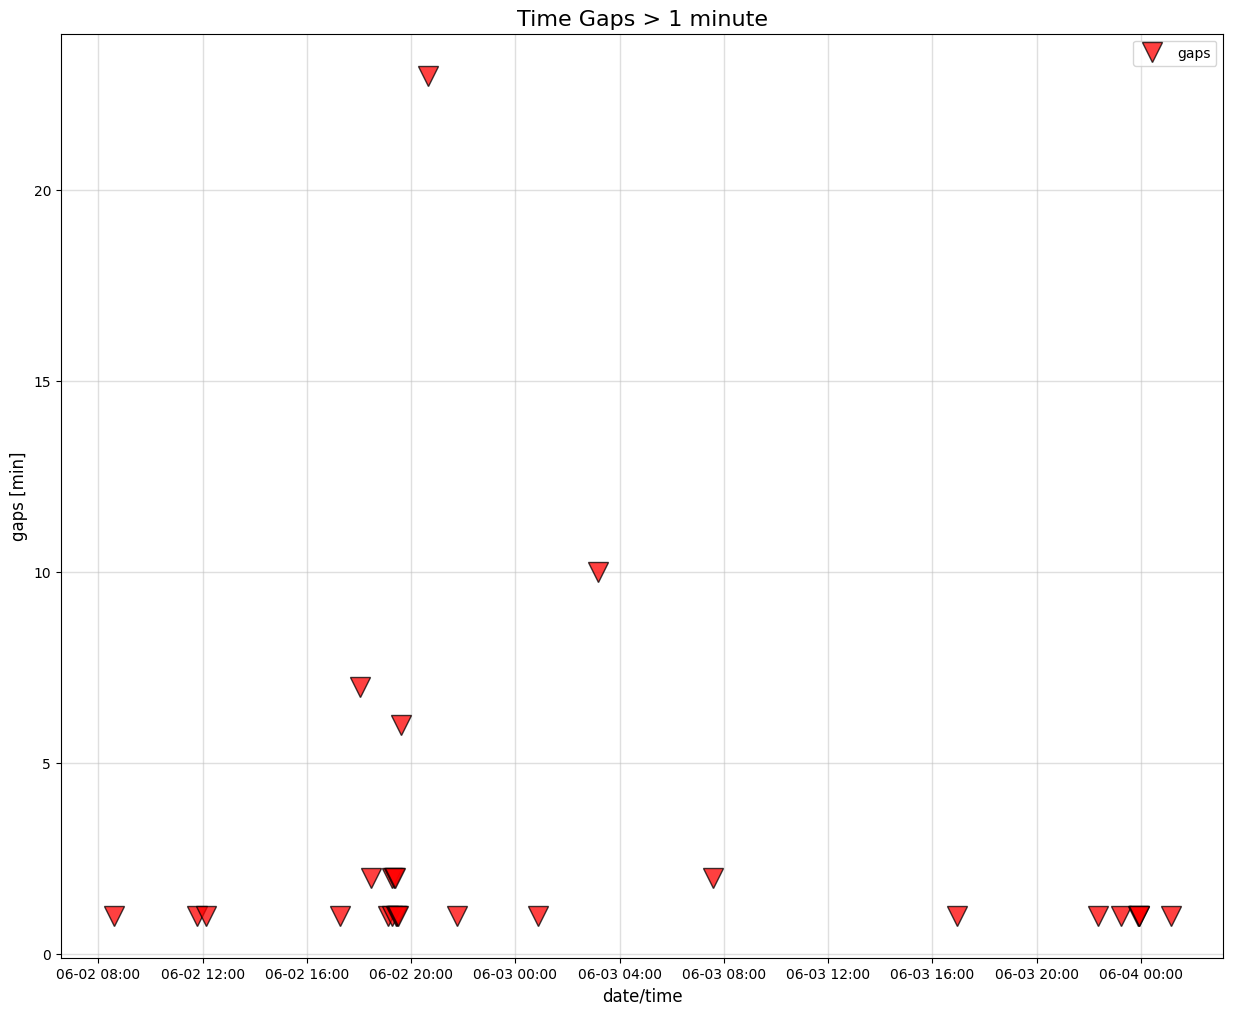

In [118]:
# plot time series gaps
_, ax = plt.subplots(1, 1, figsize=(15, 12))
ax.plot(gaps_wireless_df['timestamp'], gaps_wireless_df['time_delta'].astype('timedelta64[m]'), 
        linestyle=' ', marker='v', markersize=14, markerfacecolor='r', markeredgecolor='k', 
        alpha=0.75, label='gaps')

ax.xaxis.set_major_formatter(DateFormatter('%m-%d %H:%M', tz=tz.gettz('US/Eastern')))
ax.legend()
ax.set_title('Time Gaps > 1 minute', fontsize=16)
ax.set_xlabel('date/time', fontsize=12)
ax.set_ylabel('gaps [min]', fontsize=12)
ax.grid(color='silver', linestyle='solid', linewidth=1, alpha=0.5)
plt.show()